# Загрузка библиотек

In [ ]:
!git clone https://github.com/WillKoehrsen/feature-selector.git

Cloning into 'feature-selector'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 144 (delta 35), reused 27 (delta 27), pack-reused 97
Receiving objects: 100% (144/144), 5.07 MiB | 5.70 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [ ]:
!pip install lightgbm

In [ ]:
!pip install tabgan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 75.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 874.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
!pip install lightgbm --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# import tabgan
import lightgbm as lgb

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Фильтрация данных

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_excel('/medical_data.xlsx')

In [ ]:
df.head()

,Patient,ВК,ПИКС,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,...,SmallAreaHighGrayLevelEmphasis.1,SmallAreaLowGrayLevelEmphasis.1,ZoneEntropy.1,ZonePercentage.1,ZoneVariance.1,Busyness.1,Coarseness.1,Complexity.1,Contrast.3,Strength.1
0,Акулов Андрей Александрович,1,NaN,0.470,NaN,NaN,10.761,10.915,13.288,10.441,...,484.751,0.015,5.404,0.780,0.396,0.017,0.073,2035.194,0.338,47.442
1,Аплин Рамиль Зиннурович,1,NaN,0.188,NaN,NaN,33.179,12.948,12.948,29.683,...,479.901,0.009,5.786,0.754,0.836,0.029,0.035,1706.733,0.176,23.631
2,Афонькин АН,1,NaN,0.259,0.000,0.000,22.743,11.474,10.950,20.340,...,943.677,0.012,5.496,0.884,0.175,0.019,0.054,4315.769,0.769,43.019
3,Базоркин ТМ,1,NaN,0.253,0.000,0.000,35.266,21.529,14.963,32.702,...,307.173,0.029,5.736,0.665,0.882,0.019,0.095,832.462,0.235,44.636
4,Бахман Александр Генрихович,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(38, 218)

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.drop(columns=['ВК'], inplace=True)

In [ ]:
bad_columns = df_copy.columns[:df_copy.shape[1]//2+1]
good_columns = df_copy.columns[df_copy.shape[1]//2+1:]

In [ ]:
df_bad = df_copy[bad_columns]
df_good = df_copy[good_columns]

In [ ]:
df_good[str(df_copy.columns[0])] = df_copy.iloc[:,0]
df_good = df_good.reindex(columns=[str(df_copy.columns[0]), *list(good_columns)])

<ipython-input-26-bbc6c34888f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_good[str(df_copy.columns[0])] = df_copy.iloc[:,0]


In [ ]:
df_bad.head()

,Patient,ПИКС,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,...,SmallAreaHighGrayLevelEmphasis,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength
0,Акулов Андрей Александрович,NaN,0.470,NaN,NaN,10.761,10.915,13.288,10.441,13.990,...,823.852,0.007,5.139,0.901,0.097,0.013,0.084,3098.392,1.179,72.428
1,Аплин Рамиль Зиннурович,NaN,0.188,NaN,NaN,33.179,12.948,12.948,29.683,30.791,...,1271.920,0.007,5.967,0.822,0.299,0.015,0.041,5029.210,0.520,42.825
2,Афонькин АН,NaN,0.259,0.000,0.000,22.743,11.474,10.950,20.340,21.299,...,1899.093,0.009,5.947,0.834,0.381,0.006,0.068,7870.800,0.876,117.703
3,Базоркин ТМ,NaN,0.253,0.000,0.000,35.266,21.529,14.963,32.702,34.155,...,851.300,0.012,6.044,0.677,1.483,0.008,0.074,1404.467,0.177,61.436
4,Бахман Александр Генрихович,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_good.head()

,Patient,ЗД,Elongation.1,Flatness.1,LeastAxisLength.1,MajorAxisLength.1,Maximum2DDiameterColumn.1,Maximum2DDiameterRow.1,Maximum2DDiameterSlice.1,Maximum3DDiameter.1,...,SmallAreaHighGrayLevelEmphasis.1,SmallAreaLowGrayLevelEmphasis.1,ZoneEntropy.1,ZonePercentage.1,ZoneVariance.1,Busyness.1,Coarseness.1,Complexity.1,Contrast.3,Strength.1
0,Акулов Андрей Александрович,NaN,0.767,NaN,NaN,10.948,13.288,12.820,11.871,15.122,...,484.751,0.015,5.404,0.780,0.396,0.017,0.073,2035.194,0.338,47.442
1,Аплин Рамиль Зиннурович,NaN,0.276,NaN,NaN,31.213,17.990,13.435,29.122,30.177,...,479.901,0.009,5.786,0.754,0.836,0.029,0.035,1706.733,0.176,23.631
2,Афонькин АН,NaN,0.223,0.000,0.000,22.989,9.172,15.657,20.829,21.664,...,943.677,0.012,5.496,0.884,0.175,0.019,0.054,4315.769,0.769,43.019
3,Базоркин ТМ,NaN,0.409,NaN,NaN,17.755,13.437,13.947,17.524,19.685,...,307.173,0.029,5.736,0.665,0.882,0.019,0.095,832.462,0.235,44.636
4,Бахман Александр Генрихович,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 217 entries, Patient  to Strength.1
dtypes: float64(216), object(1)
memory usage: 64.5+ KB


In [ ]:
df.describe()

,ВК,ПИКС,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,...,SmallAreaHighGrayLevelEmphasis.1,SmallAreaLowGrayLevelEmphasis.1,ZoneEntropy.1,ZonePercentage.1,ZoneVariance.1,Busyness.1,Coarseness.1,Complexity.1,Contrast.3,Strength.1
count,38.000,0.000,33.000,15.000,15.000,33.000,33.000,33.000,33.000,33.000,...,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000,33.000
mean,0.684,NaN,0.218,0.000,0.000,26.508,16.094,12.421,24.070,25.533,...,632.591,0.017,5.602,0.770,0.708,0.027,0.063,2727.700,0.401,45.535
std,0.471,NaN,0.084,0.000,0.000,7.527,5.769,2.658,6.569,6.001,...,471.644,0.012,0.305,0.084,0.799,0.020,0.022,2691.107,0.273,25.855
min,0.000,NaN,0.097,0.000,0.000,10.761,10.248,10.119,10.441,13.990,...,64.137,0.004,4.704,0.562,0.125,0.007,0.028,276.111,0.095,12.755
25%,0.000,NaN,0.159,0.000,0.000,21.795,11.124,10.889,19.791,21.299,...,339.783,0.010,5.435,0.739,0.319,0.017,0.047,1166.400,0.235,24.389
50%,1.000,NaN,0.189,0.000,0.000,25.806,14.479,11.503,23.348,24.738,...,479.901,0.014,5.621,0.780,0.426,0.022,0.058,1761.114,0.335,38.119
75%,1.000,NaN,0.259,0.000,0.000,31.515,20.774,12.948,28.492,29.478,...,840.183,0.017,5.740,0.829,0.721,0.031,0.080,2882.335,0.467,69.538
max,1.000,NaN,0.470,0.000,0.000,40.627,30.149,23.511,36.074,36.680,...,2544.573,0.072,6.267,0.899,3.730,0.117,0.115,11448.664,1.447,108.623


In [ ]:
df_copy.isna().sum().to_frame()

,0
Patient,0
ПИКС,38
Elongation,5
Flatness,23
LeastAxisLength,23
...,...
Busyness.1,5
Coarseness.1,5
Complexity.1,5
Contrast.3,5


In [ ]:
df_copy.isnull().sum() / len(df)

Patient           0.000
ПИКС              1.000
Elongation        0.132
Flatness          0.605
LeastAxisLength   0.605
                   ... 
Busyness.1        0.132
Coarseness.1      0.132
Complexity.1      0.132
Contrast.3        0.132
Strength.1        0.132
Length: 217, dtype: float64

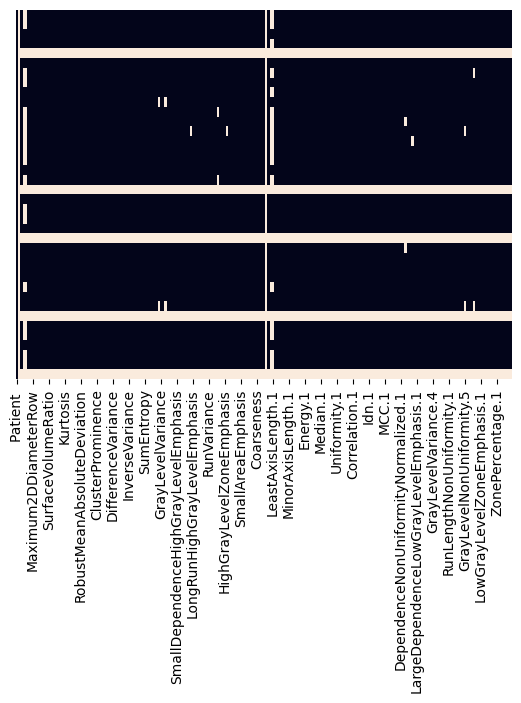

In [ ]:
sns.heatmap(df_copy.isnull(), cbar=False, yticklabels=False);

In [ ]:
threshold = 0.75

df_copy = df_copy.dropna(thresh=threshold * df_copy.shape[0], axis=1)
df_copy = df_copy.dropna(thresh=threshold * df_copy.shape[1], axis=0)

In [ ]:
df_copy.shape

(33, 211)

In [ ]:
df_copy = df_copy.fillna(df_copy.mean())

TypeError: Could not convert ['Акулов Андрей АлександровичАплин Рамиль ЗиннуровичАфонькин АНБазоркин ТМБелевцев Борис АндреевичБорисов Андрей ИвановичБрагин Леонид ИвановичБушуев АВВарламов Валерий НиколаевичГольцов Виктор ГеннадьевичГорбачев Василий ФедоровичГорбунов ПВДураков Владимир АлександровичЗиневич ВАЗолотарев ННЗырянов Анатолий ВладимировичИржанова Кафия АгисовнаКиселев Виктор АлексеевичКомаров НА не икмпКрестьяшин Олег ЛеонидовичКсенофонтов Вячеслав АлександровичЛепкалов СНЛобов Сергей ПетровичЛюдкевич ИИ (Р)Морозов АННосков Виктор ИвановичРоманов Михаил МихайловичРубцов Николай ПетровичСапего ВССимоненко Николай ВасильевичСлепкан Сергей АлександровичТкач АМУстинова ТЛ'] to numeric

In [ ]:
sns.heatmap(df_copy.isnull(), cbar=False, yticklabels=False);

In [ ]:
df_copy.head()

In [ ]:
threshold = 0.75

df_bad = df_bad.dropna(thresh=threshold * df_bad.shape[0], axis=1)
df_bad = df_bad.dropna(thresh=threshold * df_bad.shape[1], axis=0)
df_bad = df_bad.fillna(df_copy.mean())

df_good = df_good.dropna(thresh=threshold * df_good.shape[0], axis=1)
df_good = df_good.dropna(thresh=threshold * df_good.shape[1], axis=0)
df_good = df_good.fillna(df_copy.mean())

In [ ]:
df_bad.head()

In [ ]:
sns.heatmap(df_bad.isnull(), cbar=False, yticklabels=False);

In [ ]:
df_good.head()

In [ ]:
sns.heatmap(df_good.isnull(), cbar=False, yticklabels=False);

# Статистический анализ

In [ ]:
df_bad.describe()

In [ ]:
df_good.describe()

# U-test

In [ ]:
def u_test(parametr, data_1, data_2):
  result = stats.mannwhitneyu(list(data_1), list(data_2), alternative='two-sided')

  return {'parametr': parametr,
          'statistic': result[0],
          'pvalue': result[1]
          }

In [ ]:
numpy_bad = df_bad.to_numpy()[:,1:]
numpy_good = df_good.to_numpy()[:,1:]

In [ ]:
result = list(map(u_test, df_bad.columns[1:], numpy_bad.T, numpy_good.T))

In [ ]:
df_u_test = pd.DataFrame()

In [ ]:
for parametr in result:
  if parametr['pvalue'] > 0.05:
    df_hypothesis = pd.DataFrame({'parametr': [parametr['parametr']],
                                  'statistic': [parametr['statistic']],
                                  'pvalue': [parametr['pvalue']],
                                  'hypothesis': 'H0'
                                })
  else:
    df_hypothesis = pd.DataFrame({'parametr': [parametr['parametr']],
                                  'statistic': [parametr['statistic']],
                                  'pvalue': [parametr['pvalue']],
                                  'hypothesis': 'H1'
                                })

  df_u_test = pd.concat([df_u_test, df_hypothesis])

df_u_test.reset_index(inplace=True)
df_u_test.drop(columns=['index'], inplace=True)

In [ ]:
df_u_test

In [ ]:
df_u_test.groupby(['hypothesis'], group_keys=True).agg(['count'])

In [ ]:
# df_u_test.to_excel("U_test.xlsx")

# Выбор более информативных признаков c помощью feature-selector

In [ ]:
bad_labels = np.zeros(df_bad.shape[0])
good_labels = np.ones(df_good.shape[0])

In [ ]:
from feature_selector import FeatureSelector

## Для ПИКС

In [ ]:
fs = FeatureSelector(data = df_bad, labels = bad_labels)

In [ ]:
fs.identify_missing(missing_threshold = 0.6)

3 features with greater than 0.60 missing values.



In [ ]:
fs.missing_stats.head()

,missing_fraction
ПИКС,1.000
Flatness,0.605
LeastAxisLength,0.605
GrayLevelNonUniformity,0.184
LargeDependenceEmphasis,0.184


In [ ]:
fs.identify_collinear(correlation_threshold = 0.98)

ValueError: could not convert string to float: 'Акулов Андрей Александрович'

In [ ]:
fs.plot_collinear()

In [ ]:
# список признаков для удаления
collinear_features = fs.ops['collinear']

# датафрейм коллинеарных признаков
fs.record_collinear.head()

In [ ]:
fs.plot_collinear(plot_all=True)

## Для ЭД

In [ ]:
fs = FeatureSelector(data = df_good, labels = good_labels)

In [ ]:
fs.identify_missing(missing_threshold = 0.6)

1 features with greater than 0.60 missing values.



In [ ]:
fs.missing_stats.head()

,missing_fraction
ЗД,1.000
Flatness.1,0.579
LeastAxisLength.1,0.579
LargeAreaEmphasis.1,0.184
GrayLevelNonUniformity.5,0.184


In [ ]:
fs.identify_collinear(correlation_threshold = 0.98)

ValueError: could not convert string to float: 'Акулов Андрей Александрович'

In [ ]:
fs.plot_collinear()

In [ ]:
# список признаков для удаления
collinear_features = fs.ops['collinear']

# датафрейм коллинеарных признаков
fs.record_collinear.head()

In [ ]:
fs.plot_collinear(plot_all=True)

## Выбор признаков для всего датасета

In [ ]:
df_bad_copy = df_bad.copy()
df_good_copy = df_good.copy()

In [ ]:
df_good_copy.columns = list(df_bad_copy.columns)

In [ ]:
df_bad_copy['label'] = bad_labels
df_good_copy['label'] = good_labels

In [ ]:
new_df = pd.concat([df_bad_copy, df_good_copy], ignore_index=True)

In [ ]:
new_df.head()

,Patient,ПИКС,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,...,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength,label
0,Акулов Андрей Александрович,NaN,0.470,NaN,NaN,10.761,10.915,13.288,10.441,13.990,...,0.007,5.139,0.901,0.097,0.013,0.084,3098.392,1.179,72.428,0.000
1,Аплин Рамиль Зиннурович,NaN,0.188,NaN,NaN,33.179,12.948,12.948,29.683,30.791,...,0.007,5.967,0.822,0.299,0.015,0.041,5029.210,0.520,42.825,0.000
2,Афонькин АН,NaN,0.259,0.000,0.000,22.743,11.474,10.950,20.340,21.299,...,0.009,5.947,0.834,0.381,0.006,0.068,7870.800,0.876,117.703,0.000
3,Базоркин ТМ,NaN,0.253,0.000,0.000,35.266,21.529,14.963,32.702,34.155,...,0.012,6.044,0.677,1.483,0.008,0.074,1404.467,0.177,61.436,0.000
4,Бахман Александр Генрихович,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [ ]:
new_df = new_df.sample(frac=1).reset_index(drop=True)

In [ ]:
new_df.head()

,Patient,ПИКС,Elongation,Flatness,LeastAxisLength,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,...,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZonePercentage,ZoneVariance,Busyness,Coarseness,Complexity,Contrast.1,Strength,label
0,Базоркин ТМ,NaN,0.253,0.000,0.000,35.266,21.529,14.963,32.702,34.155,...,0.012,6.044,0.677,1.483,0.008,0.074,1404.467,0.177,61.436,0.000
1,Людкевич ИИ (Р),NaN,0.200,0.000,0.000,36.577,25.429,11.288,31.950,32.795,...,0.008,5.749,0.748,0.864,0.017,0.058,1785.574,0.237,35.044,0.000
2,Комаров НА не икмп,NaN,0.290,NaN,NaN,28.977,24.471,12.640,26.905,27.934,...,0.016,5.815,0.797,0.323,0.016,0.070,1724.292,0.205,54.670,0.000
3,Карбышев НВ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,Карбышев НВ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000


In [ ]:
X = new_df.iloc[:,1:-1]
X = (X - X.mean()) / X.std()

y = new_df['label']

In [ ]:
fs = FeatureSelector(data = X, labels = y)

### Пропущенные значения

In [ ]:
fs.identify_missing(missing_threshold = 0.6)

1 features with greater than 0.60 missing values.



In [ ]:
fs.missing_stats.head()

,missing_fraction
ПИКС,1.000
Flatness,0.592
LeastAxisLength,0.592
GrayLevelNonUniformity,0.184
GrayLevelNonUniformity.2,0.184


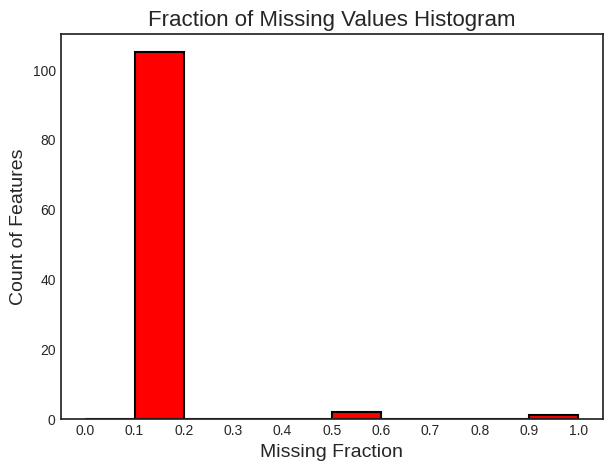

In [ ]:
fs.plot_missing()

### Коллинеарные признаки

In [ ]:
fs.identify_collinear(correlation_threshold = 0.98)

/content/feature_selector.py:198: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
fs.plot_collinear()

NotImplementedError: Collinear features have not been idenfitied. Run `identify_collinear`.

In [ ]:
# список признаков для удаления
collinear_features = fs.ops['collinear']

# датафрейм коллинеарных признаков
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,Maximum2DDiameterSlice,MajorAxisLength,0.995
1,Maximum3DDiameter,MajorAxisLength,0.994
2,Maximum3DDiameter,Maximum2DDiameterSlice,0.999
3,VoxelVolume,MeshVolume,0.999
4,Median,Mean,0.996


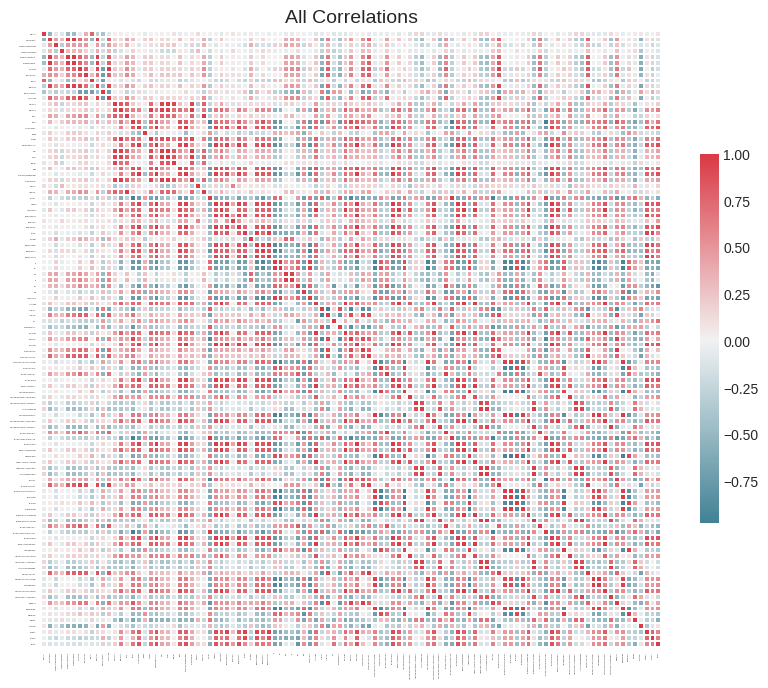

In [ ]:
fs.plot_collinear(plot_all=True)

In [ ]:
# fs.record_collinear.to_excel("collinear.xlsx")

### Признаки с нулевой важностью

Два перечисленных метода могут быть применены к любому структурированному набору данных. Они являются детерминированными, то есть результаты их работы не меняются в разных подходах.

Метод, который мы разберем сейчас, недетерминированный и предназначен только для задач контролируемого машинного обучения с обучающими метками. Функция ``` identify_zero_importance``` находит признаки, которые имеют нулевую важность. В моделях на основе деревьев решений такие параметры не используются, поэтому мы можем смело удалить их, не влияя на производительность.

FeatureSelector устанавливает важность признаков с помощью алгоритма градиентного бустинга из библиотеки LightGBM. Показатель усредняется по 10 тренировочным прогонам GBM для уменьшения дисперсии. Кроме того, используется ранняя остановка с проверочным набором, чтобы предотвратить переобучение. Эту опцию можно отключить.

In [ ]:
# lgb_params = {
#   'n_jobs': -1,
#   'n_estimators': 2000,
#   'learning_rate': 0.05,
#   'importance_type': 'split',
#   'early_stopping_rounds': 100,
#   'verbose': -1
# }

In [ ]:
fs.identify_zero_importance(task = 'classification',
                            eval_metric = 'auc',
                            n_iterations = 10,
                            early_stopping = True)

zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model


82 features with zero or negative importance after one-hot encoding.



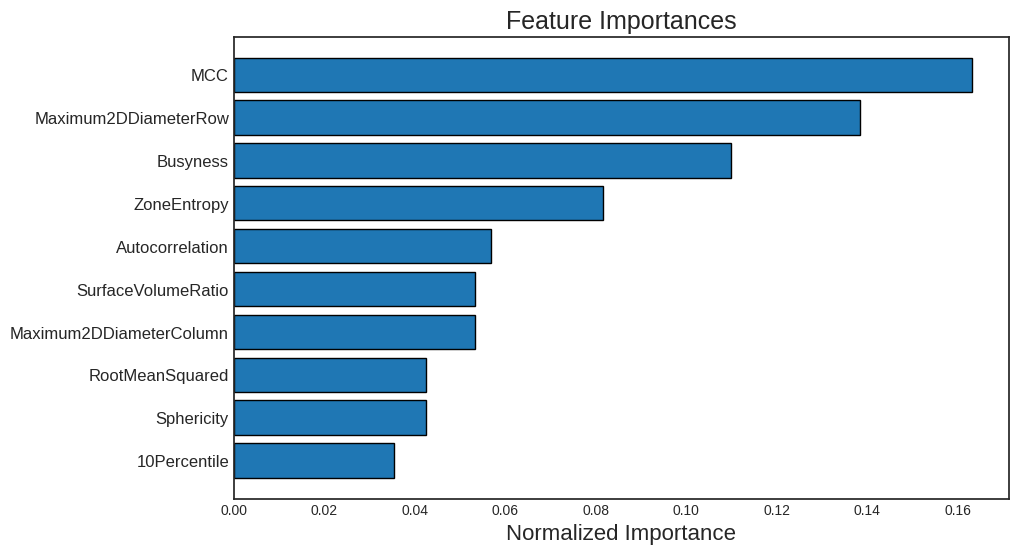

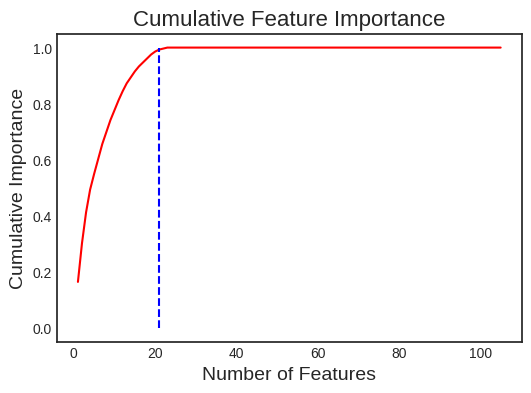

21 features required for 0.99 of cumulative importance


In [ ]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 10)

In [ ]:
fs.feature_importances.head(20)

,feature,importance,normalized_importance,cumulative_importance
0,MCC,4.600,0.163,0.163
1,Maximum2DDiameterRow,3.900,0.138,0.301
2,Busyness,3.100,0.110,0.411
3,ZoneEntropy,2.300,0.082,0.493
4,Autocorrelation,1.600,0.057,0.550
5,SurfaceVolumeRatio,1.500,0.053,0.603
6,Maximum2DDiameterColumn,1.500,0.053,0.656
7,RootMeanSquared,1.200,0.043,0.699
8,Sphericity,1.200,0.043,0.741
9,10Percentile,1.000,0.035,0.777


In [ ]:
importance_features = fs.feature_importances['feature'][:20]

In [ ]:
importance_features

0                                      MCC
1                     Maximum2DDiameterRow
2                                 Busyness
3                              ZoneEntropy
4                          Autocorrelation
5                       SurfaceVolumeRatio
6                  Maximum2DDiameterColumn
7                          RootMeanSquared
8                               Sphericity
9                             10Percentile
10                      MaximumProbability
11                GrayLevelNonUniformity.2
12                                Kurtosis
13    SmallDependenceHighGrayLevelEmphasis
14                             Correlation
15                      DependenceVariance
16                       LargeAreaEmphasis
17                        ShortRunEmphasis
18                            JointEntropy
19           SmallAreaLowGrayLevelEmphasis
Name: feature, dtype: object

In [ ]:
# fs.feature_importances.to_excel("zero_importance_features.xlsx")

### Признаки с низкой важностью

Функция ```low_importance``` основывается на том же подходе, что и метод главных компонент (PCA).

In [ ]:
fs.identify_low_importance(cumulative_importance = 0.98)

20 features required for cumulative importance of 0.98 after one hot encoding.
85 features do not contribute to cumulative importance of 0.98.



In [ ]:
fs.feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,MCC,6.600,0.193,0.193
1,Busyness,4.800,0.140,0.333
2,10Percentile,2.700,0.079,0.412
3,Maximum2DDiameterRow,2.700,0.079,0.491
4,DependenceVariance,1.800,0.053,0.544
5,Maximum2DDiameterColumn,1.700,0.050,0.594
6,Kurtosis,1.600,0.047,0.640
7,Imc2,1.600,0.047,0.687
8,LargeAreaEmphasis,1.500,0.044,0.731
9,Sphericity,1.400,0.041,0.772


In [ ]:
# fs.feature_importances.to_excel("identify_low_importance.xlsx")

### Признаки с единственным значением

In [ ]:
fs.identify_single_unique()

0 features with a single unique value.



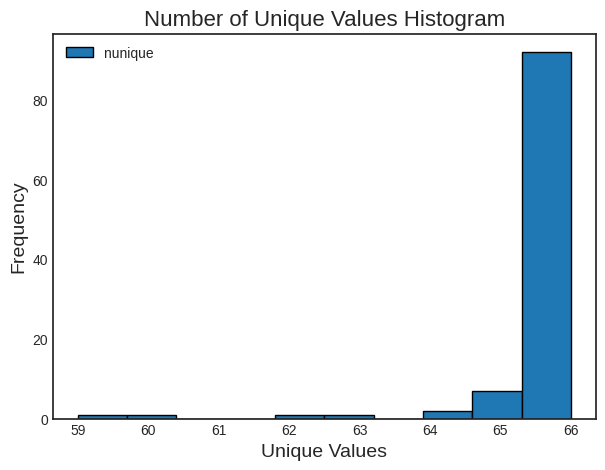

In [ ]:
fs.plot_unique()

### Отбор признаков всеми методами

In [ ]:
fs.identify_all(selection_params = {'missing_threshold': 0.6,
                                    'correlation_threshold': 0.98,
                                    'task': 'classification',
                                    'eval_metric': 'auc',
                                    'importance_type': 'split',
                                    'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

33 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model



/content/feature_selector.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
/content/feature_selector.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
/content/feature_selector.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
/content/feature_selector.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
/content/feature_selector.py:223


58 features with zero or negative importance after one-hot encoding.

42 features required for cumulative importance of 0.99 after one hot encoding.
63 features do not contribute to cumulative importance of 0.99.

69 total features out of 105 identified for removal after one-hot encoding.



### Код для удаления признаков

In [ ]:
df_informative_features = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'collinear', 'zero_importance', 'low_importance', 'single_unique'] methods have been run

Removed 69 features including one-hot features.


In [ ]:
df_informative_features

,Elongation,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Sphericity,SurfaceVolumeRatio,InterquartileRange,Kurtosis,Skewness,ClusterShade,...,SmallDependenceLowGrayLevelEmphasis,RunLengthNonUniformityNormalized,GrayLevelNonUniformity.2,LargeAreaEmphasis,SizeZoneNonUniformityNormalized,SmallAreaLowGrayLevelEmphasis,ZoneEntropy,ZoneVariance,Busyness,Coarseness
0,0.339,-0.336,0.285,-0.395,1.039,-0.920,-1.457,2.702,-1.722,-0.251,...,-0.583,-3.263,1.222,4.759,-1.835,-0.096,-0.480,5.087,0.402,-0.375
1,-0.496,-0.015,-0.775,2.104,0.142,-0.238,0.616,-0.607,-0.404,-0.423,...,0.254,0.563,-0.703,-0.412,0.522,0.210,0.790,-0.289,-0.825,0.476
2,-0.543,-0.385,-0.712,-0.498,-1.331,1.506,3.264,-0.798,-0.656,-2.734,...,1.468,1.711,-1.281,-1.083,2.114,0.942,0.626,-0.804,-0.690,-1.443
3,-0.884,-0.514,0.828,-0.728,-1.204,1.949,-0.006,-0.799,-1.212,-0.777,...,0.962,0.210,-1.084,-0.345,-0.510,0.749,-1.200,-0.418,-0.699,3.297
4,0.239,-0.419,1.358,-0.498,0.928,-0.693,0.321,-0.444,0.623,0.172,...,-0.587,0.218,-0.436,0.304,0.123,-0.542,0.383,-0.499,-0.120,-0.023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,5.075,-1.620,-0.367,-0.251,2.251,-0.783,-0.791,0.243,0.529,-0.066,...,-0.084,-0.223,-0.242,-0.189,-0.422,-0.012,-0.421,-0.251,-0.313,0.227
62,-0.542,0.904,0.792,-0.395,0.151,-0.931,0.090,-0.087,-0.124,-0.292,...,-0.998,0.514,1.184,-0.663,0.479,-0.915,1.018,-0.571,-0.487,-0.927
63,0.491,-0.105,-0.177,-0.040,-0.225,-0.555,2.326,-0.546,0.996,4.550,...,-0.768,1.283,-0.329,-0.924,1.534,-0.766,2.405,-0.704,-0.773,-1.364
64,-0.725,-0.378,-0.657,-0.635,-1.093,1.307,1.221,-0.742,0.713,0.453,...,0.484,0.306,-1.027,-0.568,0.256,0.309,-0.373,-0.513,-0.546,0.983


# PCA

In [ ]:
X_centered = X - X.mean()

In [ ]:
cov_matrix = np.cov(X_centered)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [ ]:
index_informative_features = np.where(eigenvalues > np.median(eigenvalues))[0]

In [ ]:
df_informative_features = X.iloc[:,list(index_informative_features)]

In [ ]:
df_informative_features

,Elongation,MajorAxisLength,Maximum2DDiameterColumn,Maximum2DDiameterRow,Maximum2DDiameterSlice,Maximum3DDiameter,MeshVolume,MinorAxisLength,Sphericity,SurfaceArea,...,Range,RobustMeanAbsoluteDeviation,RootMeanSquared,Skewness,TotalEnergy,Uniformity,Variance,Autocorrelation,ClusterProminence,ClusterShade
0,-0.415,0.145,1.819,-0.758,0.153,0.083,-0.033,-0.184,0.382,-0.130,...,-0.917,-0.714,-0.195,-0.660,-0.213,0.781,-0.768,-0.473,-0.556,-0.272
1,1.201,-1.436,-0.384,-0.642,-1.466,-1.379,-1.230,-0.689,0.459,-1.368,...,2.151,2.661,1.664,1.079,-0.099,-0.648,2.894,1.115,2.301,2.748
2,-0.733,1.298,0.001,-0.539,1.206,1.212,0.299,0.302,-1.081,0.842,...,1.970,0.050,1.865,-1.476,1.050,-0.632,0.451,3.604,0.447,-1.311
3,-0.384,-0.460,1.002,-0.653,-0.555,-0.564,-0.603,-0.765,0.383,-0.664,...,-1.224,-0.631,-1.224,0.516,-0.498,0.823,-0.752,-0.867,-0.554,-0.115
4,-0.792,1.251,1.392,-0.565,1.269,1.260,0.882,0.135,-0.398,1.008,...,-0.401,-0.419,-0.700,-0.077,-0.259,-0.114,-0.515,-0.463,-0.468,-0.228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,-0.010,-0.600,-0.591,-0.427,-0.520,-0.517,-0.493,-0.481,0.442,-0.572,...,-1.005,-0.366,-1.122,-0.360,-0.479,0.135,-0.590,-0.685,-0.516,-0.317
62,0.129,-0.435,-0.551,-0.183,-0.472,-0.479,-0.187,-0.104,0.904,-0.423,...,0.506,-0.036,-0.213,-0.178,-0.248,-0.528,-0.005,0.364,-0.066,-0.356
63,-0.898,-0.204,-0.564,-0.734,-0.257,-0.264,-1.108,-1.202,-1.743,-0.637,...,1.421,0.394,1.033,1.135,-0.156,-0.705,0.791,0.561,0.656,0.997
64,-0.615,0.625,1.726,-0.581,0.570,0.547,0.215,-0.055,-0.224,0.327,...,-0.743,-0.830,-0.013,-0.754,-0.091,0.762,-0.717,-0.677,-0.541,-0.336


In [ ]:
# df_informative_features.to_excel("pca.xlsx")

In [ ]:
df_informative_features.columns

Index(['Elongation', 'MajorAxisLength', 'Maximum2DDiameterColumn',
       'Maximum2DDiameterRow', 'Maximum2DDiameterSlice', 'Maximum3DDiameter',
       'MeshVolume', 'MinorAxisLength', 'Sphericity', 'SurfaceArea',
       'SurfaceVolumeRatio', 'VoxelVolume', '10Percentile', '90Percentile',
       'Energy', 'Entropy', 'InterquartileRange', 'Kurtosis', 'Maximum',
       'MeanAbsoluteDeviation', 'Mean', 'Median', 'Minimum', 'Range',
       'RobustMeanAbsoluteDeviation', 'RootMeanSquared', 'Skewness',
       'TotalEnergy', 'Uniformity', 'Variance', 'Autocorrelation',
       'ClusterProminence', 'ClusterShade'],
      dtype='object')

# Lasso

## Не стандартизированные величины

In [ ]:
clf = linear_model.Lasso(alpha=0.1)

In [ ]:
clf.fit(X, y)

Lasso(alpha=0.1)

In [ ]:
count = 0
for i in clf.coef_:
    if i != 0:
        count += 1

print(f'Модель отобрала {count} признаков. Настоящее количество информативных признаков: {X.shape[1]}')

Модель отобрала 9 признаков. Настоящее количество информативных признаков: 105


In [ ]:
index_informative_features = np.where(clf.coef_ != 0)[0]

In [ ]:
index_informative_features

array([ 3,  7, 10, 13, 26, 49, 56, 84, 88])

In [ ]:
df_informative_features = X.iloc[:,list(index_informative_features)]

In [ ]:
df_informative_features.head()

,Maximum2DDiameterRow,MinorAxisLength,SurfaceVolumeRatio,90Percentile,Skewness,MCC,DependenceNonUniformityNormalized,GrayLevelNonUniformity.2,LargeAreaEmphasis
0,-0.040,0.664,-0.865,-1.008,0.024,1.255,-1.403,-0.344,0.939
1,-0.539,-0.984,0.643,-0.882,0.918,-0.282,0.790,-0.858,-0.412
2,0.857,0.832,-0.768,-1.139,0.460,-0.395,-0.272,0.478,-0.118
3,0.161,-0.074,-0.157,-0.107,-0.340,0.611,0.672,-0.665,-0.536
4,-0.136,1.365,-1.454,0.159,-0.047,-1.658,-0.701,2.666,0.377


## Стандартизированные величины

In [ ]:
# df_informative_features.to_excel("lasso.xlsx")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

Model selected 6 features. True number of informative features: 105


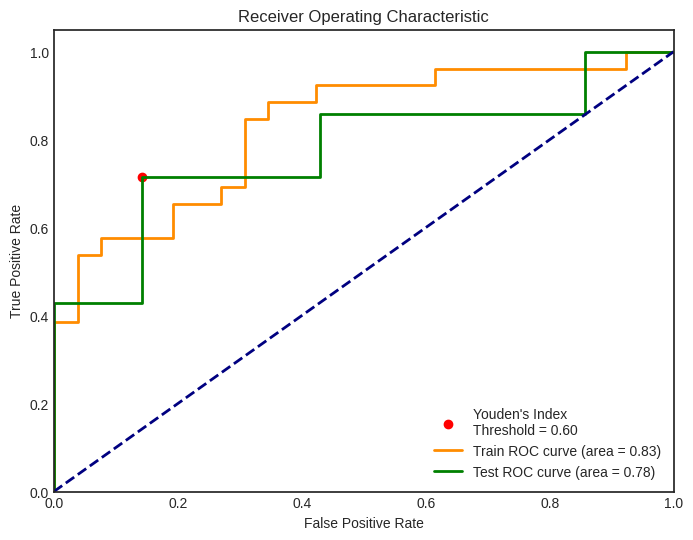

In [ ]:
# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit Lasso regression model
alpha = 0.1
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

# Count the selected features
count = np.count_nonzero(lasso.coef_)

print(f'Model selected {count} features. True number of informative features: {X_train.shape[1]}')

# Identify indices of informative features
index_informative_features = np.where(lasso.coef_ != 0)[0]

# Extract informative features from the original dataset
df_informative_features_train = X_train[:, index_informative_features]
df_informative_features_test = X_test[:, index_informative_features]

# Predictions on the training set
y_train_pred = lasso.predict(X_train)

# Predictions on the test set
y_test_pred = lasso.predict(X_test)

# Convert regression predictions to binary labels for classification
threshold = 0.5
y_train_pred_class = (y_train_pred > threshold).astype(int)
y_test_pred_class = (y_test_pred > threshold).astype(int)

# Compute ROC AUC for training and test sets
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Compute ROC curves
fpr_train, tpr_train, thr_train = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thr_test = roc_curve(y_test, y_test_pred)

# Plot ROC curves
plt.figure(figsize=(8, 6))

# Find the index of the point on the ROC curve closest to (0, 1)
closest_index = np.argmax(tpr_test - fpr_test)

# Find the threshold corresponding to the closest point
optimal_threshold = thr_test[closest_index]

# Отметка точки на ROC кривой
plt.scatter(fpr_test[closest_index], tpr_test[closest_index], marker='o', color='red', label=f'Youden\'s Index\nThreshold = {optimal_threshold:.2f}')

plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


# Logistic Regression

roc curve youden index

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

по PCA

In [ ]:
# X = df_informative_features.copy()

по ансамблю

In [ ]:
X = X[importance_features].copy()

по lasso

In [ ]:
# X = X.iloc[:, list(index_informative_features)].copy()

Training Accuracy: 0.87
Training Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87        26
         1.0       0.88      0.85      0.86        26

    accuracy                           0.87        52
   macro avg       0.87      0.87      0.87        52
weighted avg       0.87      0.87      0.87        52

Test Accuracy: 0.43
Test Classification Report:
              precision    recall  f1-score   support

         0.0       0.45      0.71      0.56         7
         1.0       0.33      0.14      0.20         7

    accuracy                           0.43        14
   macro avg       0.39      0.43      0.38        14
weighted avg       0.39      0.43      0.38        14

Test Sensitivity: 14.29 %

Test Specificity: 71.43 %


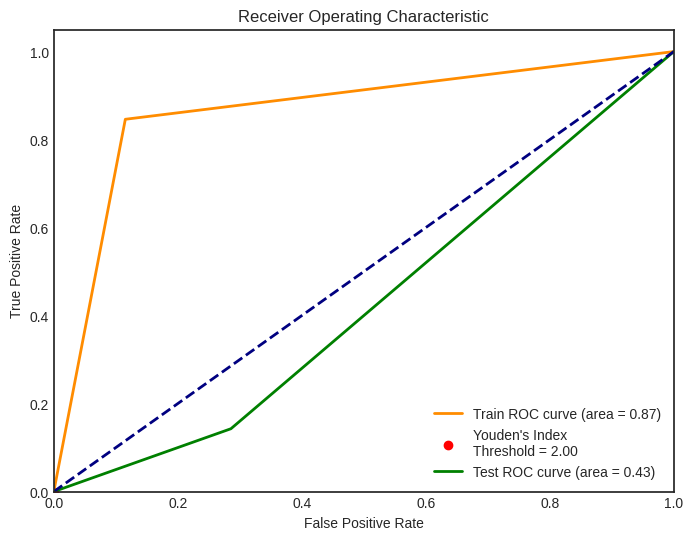

In [ ]:
def train_evaluate_logistic_regression(X_train, y_train, X_test, y_test):
    # Создайте пайплайн
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Масштабирование признаков
        ('lasso', LogisticRegression(penalty='l2', solver='liblinear'))  # Логистическая регрессия с L2-регуляризацией
    ])

    # Обучите модель с использованием пайплайна на тренировочных данных
    pipeline.fit(X_train, y_train)

    # Предсказания на тренировочном наборе
    y_train_pred = pipeline.predict(X_train)

    # Оценка качества модели на тренировочном наборе
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print(f'Training Accuracy: {accuracy_train:.2f}')

    # Вывод отчета о классификации для тренировочного набора
    print("Training Classification Report:")
    print(classification_report(y_train, y_train_pred))

    # Вычисление ROC AUC для тренировочного набора
    roc_auc_train = roc_auc_score(y_train, y_train_pred)

    # Вычисление ROC-кривой для тренировочного набора
    fpr_train, tpr_train, thr_train = roc_curve(y_train, y_train_pred)

    # Построение ROC-кривой для тренировочного набора
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)

    # Предсказания на тестовом наборе
    y_test_pred = pipeline.predict(X_test)

    # Оценка качества модели на тестовом наборе
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f'Test Accuracy: {accuracy_test:.2f}')

    # Вывод отчета о классификации для тестового набора
    print("Test Classification Report:")
    print(classification_report(y_test, y_test_pred))

    # Вычисление ROC AUC для тестового набора
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
    print(f'Test Sensitivity: {tp / (tp + fn) * 100:.2f} %')
    print()
    print(f'Test Specificity: {tn / (fp + tn) * 100:.2f} %')

    # Вычисление ROC-кривой для тестового набора
    fpr_test, tpr_test, thr_test = roc_curve(y_test, y_test_pred)

    # Найти индекс точки на ROC кривой, ближайшей к (0, 1)
    closest_index = np.argmax(tpr_test - fpr_test)

    # Найти порог, соответствующий ближайшей точке
    optimal_threshold = thr_test[closest_index]

    # Отметка точки на ROC кривой
    plt.scatter(fpr_test[closest_index], tpr_test[closest_index], marker='o', color='red', label=f'Youden\'s Index\nThreshold = {optimal_threshold:.2f}')

    # Построение ROC-кривой для тестового набора
    plt.plot(fpr_test, tpr_test, color='green', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)

    # Остальные параметры для отображения ROC-кривой
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Используйте функцию, передавая ей тренировочные и тестовые данные
train_evaluate_logistic_regression(X_train, y_train, X_test, y_test)
